# common-lisp-jupyter

A Common Lisp kernel for Jupyter.

All stream output is captured and displayed in the notebook interface.

In [1]:
(format t "Hello, World")
(format *error-output* "Goodbye, cruel World.")

NIL

NIL

Hello, World

Goodbye, cruel World.

In [2]:
(format j:*markdown-output* "# Title
This is *markdown*!")

NIL

# Title
This is *markdown*!

Evaluation results are displayed directory in the notebook.

In [3]:
(+ 2 3 4 5)

14

All Lisp code is value, including calls to quicklisp.

In [4]:
(ql:quickload :shasht)

To load "shasht":
  Load 1 ASDF system:
    shasht


(:SHASHT)

; Loading "shasht"



The serialized JSON will represented as a Lisp string.

In [5]:
(shasht:write-json `(:object-plist "foo" "bar" "quux" 1.23) t)

(:OBJECT-PLIST "foo" "bar" "quux" 1.23)

{
  "foo": "bar",
  "quux": 1.23
}

JSON can also be displayed with open/close expanders using `json` or `json-file`

In [6]:
(jupyter:json `(:object-plist "foo" "bar" "quux" (:object-plist "a" 1 "b" 2)) :expanded t :display t :id "a")

If you use `display_data` and assign an id then you can update the result later on.

In [7]:
(jupyter:json `(:object-plist "foo" "bar" "quux" (:object-plist "a" 1 "b" 2 "c" 3)) :expanded t :display t :update t :id "a")

Error conditions will be captured and a backtrace will be sent to `*error-output*`

In [8]:
(/ 1 0)

DIVISION-BY-ZERO: arithmetic error DIVISION-BY-ZERO signalled
Operation was (/ 1 0).

#<ENVIRONMENT {1003A05853}>
   [Environment of thread #<THREAD "SHELL Thread" RUNNING {10051C8C13}>]

arithmetic error DIVISION-BY-ZERO signalled
Operation was (/ 1 0).
   [Condition of type DIVISION-BY-ZERO]


Backtrace:
 3: ((FLET "H1" :IN COMMON-LISP-JUPYTER::MY-EVAL) arithmetic error DIVISION-BY-ZERO signalled
Operation was (/ 1 0).)
 4: (SB-KERNEL::%SIGNAL arithmetic error DIVISION-BY-ZERO signalled
Operation was (/ 1 0).)
 5: (ERROR DIVISION-BY-ZERO OPERATION / OPERANDS (1 0))
 6: ("DIVISION-BY-ZERO-ERROR" 1 0)
 7: (SB-KERNEL:INTERNAL-ERROR #.(SB-SYS:INT-SAP #X7F7B8362DC80) #<unused argument>)
 8: ("foreign function: call_into_lisp")
 9: ("foreign function: funcall2")
 10: ("foreign function: interrupt_internal_error")
 11: ("foreign function: #x558902F62993")
 12: (SB-KERNEL::INTEGER-/-INTEGER 1 0)
 13: (/ 1 0)
 14: (SB-INT:SIMPLE-EVAL-IN-LEXENV (/ 1 0) #<NULL-LEXENV>)
 15: (EVAL (/ 1 0))
 16: (COMMON-LISP-JUPYTER::MY-EVAL (/ 1 0))
 17: ((:METHOD JUPYTER:EVALUATE-CODE (COMMON-LI

New functions can be defined. The default namespace is `COMMON-LISP-USER`.

In [8]:
(defun fibonacci (n)
    (if (<= n 1)
        1
        (+ (fibonacci (- n 2)) (fibonacci (- n 1)))))

FIBONACCI

The seventh element of everybody's favorite sequence.

In [9]:
(fibonacci 7)

21

S-Expressions will be displayed using `pprint`.

In [10]:
(function-lambda-expression #'fibonacci)

(LAMBDA (N)
  (BLOCK FIBONACCI
    (IF (<= N 1)
        1
        (+ (FIBONACCI (- N 2)) (FIBONACCI (- N 1))))))

T

FIBONACCI

Rich text and images can be displayed using inline values using the `inline-result`, `html`, `jpeg`, `latex`, `markdown`, `png`, `svg` or `text` functions. 

In [11]:
(jupyter:markdown "## wibble
foo `quux`")

## wibble
foo `quux`

In [12]:
(jupyter:latex "$$R_{\\mu \\nu} - \\tfrac{1}{2}R \\, g_{\\mu \\nu} + \\Lambda g_{\\mu \\nu} =
               8 \\pi G c^{-4} T_{\\mu \\nu}$$")

External files can be rendered using the `file`, `gif-file`, `jpeg-file`, `png-file`, `ps-file`, `svg-file` functions. 

The MIME type will be automatically determined in the case of a call to `file`.

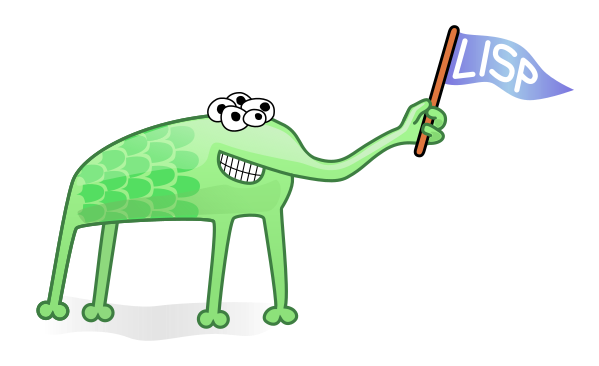

In [13]:
(jupyter:file "lisplogo_alien.svg" :display t)

Calls to `yes-or-no-p` will result in a `input_request` to the user.

In [14]:
(defparameter lisp-rocks (yes-or-no-p "LISP rocks?"))


LISP rocks? (yes or no)  yes


LISP-ROCKS

In [15]:
(jupyter:markdown (format nil "For the record Lisp ~A" (if lisp-rocks "**rocks**!" "**does not** rock.")))

For the record Lisp **rocks**!

Output send to `*query-io*` will result also result in an input_request to the user.

In [16]:
(defun ask (prompt)
    (format *query-io* prompt)
    (finish-output *query-io*)
    (read-line *query-io*))

ASK

In [17]:
(defvar quest (ask "What is your quest? "))

What is your quest?  wibble


QUEST

In [18]:
(format t "Your quest is: ~A" quest)

NIL

Your quest is: wibble

`jupyter:clear` will clear the output of the current.

In [19]:
(loop
    for i from 1 to 10
    do (sleep 0.25)
    do (jupyter:clear t)
    do (print i)
    do (finish-output *standard-output*)
    finally (return (values)))


10 

`(values)` can be used to suppress the output. Defining a reader macro can make this easier.

In [20]:
(defun no-output-reader (stream char)
   (declare (ignore char))
   (list (quote progn) (read stream t nil t) (values)))

(set-macro-character #\~ #'no-output-reader)

NO-OUTPUT-READER

T

In [21]:
~(format t "No output returned!")

NIL

No output returned!

Multiple value returns function correctly and previous result/form are set. 

In [22]:
(values 'a1 'a2) 
'b 
(values 'c1 'c2 'c3) 
(list / // ///)

A1

A2

B

C1

C2

C3

((C1 C2 C3) (B) (A1 A2))

In [23]:
(values 'a1 'a2) 
'b 
(values 'c1 'c2 'c3) 
(list * ** ***)

A1

A2

B

C1

C2

C3

(C1 B A1)

In [24]:
(+ 0 1) 
(- 4 2) 
(/ 9 3) 
(list + ++ +++)

1

2

3

((/ 9 3) (- 4 2) (+ 0 1))